<a href="https://colab.research.google.com/github/Karthick-code/Sirpi_Exercises/blob/main/Regression_Model_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
**Linear regression** is a way to find a straight line that best fits a set of data points. It helps us understand the relationship between two things.

For example, imagine you're trying to predict someone's weight based on their height. You collect data on people's heights and weights, and linear regression helps you find the line that shows how weight changes as height changes.

So, in essence, linear regression is used to predict one thing based on another, and it tries to draw the best possible straight line through the data points.

In [ ]:
from google.colab import drive #here we are importing drive to upload csv from drive
drive.mount('/content/drive') # /content/drive/MyDrive/Team-sirpi/used_cars.csv # this is the path location from drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Packages
  we are importing some pakages to perform some operations

*   pandas for reading csv and perform operations
*   numpy to perfom arithmetic operation
*   matplotlib is used visualize the data in graph format
*   seaborn is used as an advanced format os matplotlib
*   sklearn.model_selection -- it is an package used for accesing train_test_split function which used for splitting the dataset into train and test.
*   sklearn.linear_model -- it is also a defined package which is used to import LinearRegression class

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Uploading file from drive


In [ ]:
used_cars=pd.read_csv('/content/drive/MyDrive/Team-sirpi/used_cars.csv')
used_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


# 1.Data Cleaning and Preparation

In [ ]:
print(used_cars.isnull().sum())

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


In [ ]:
df=used_cars.copy()
df[df["fuel_type"].isnull()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"
44,Lucid,Air Grand Touring,2022,"3,552 mi.",NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,"$119,999"
68,Lucid,Air Grand Touring,2022,"4,900 mi.",NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,"$99,000"
92,Rivian,R1S Adventure Package,2023,"2,800 mi.",NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,Yes,"$92,000"
122,Rivian,R1S Adventure Package,2023,"2,500 mi.",NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,Yes,"$94,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Tesla,Model Y Long Range,2021,"49,252 mi.",NaN,Electric,1-Speed Automatic,Deep Blue Metallic,Black,None reported,NaN,"$37,999"
3913,Tesla,Model S 100D,2018,"65,000 mi.",NaN,518.0HP Electric Motor Electric Fuel System,A/T,Blue,Black,None reported,Yes,"$41,000"
3932,Tesla,Model X Performance,2020,"25,535 mi.",NaN,778.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,"$68,969"
3961,Tesla,Model 3 Long Range,2021,"23,749 mi.",NaN,Electric,1-Speed Automatic,White,Black,None reported,NaN,"$35,999"


# Updating missing values for fueltype based on engine

In [ ]:
df_sam=df[df["fuel_type"].isnull()]
df_sam # sample dataframe for updating missing fuel types

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"
44,Lucid,Air Grand Touring,2022,"3,552 mi.",NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,"$119,999"
68,Lucid,Air Grand Touring,2022,"4,900 mi.",NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,"$99,000"
92,Rivian,R1S Adventure Package,2023,"2,800 mi.",NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,Yes,"$92,000"
122,Rivian,R1S Adventure Package,2023,"2,500 mi.",NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,Yes,"$94,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Tesla,Model Y Long Range,2021,"49,252 mi.",NaN,Electric,1-Speed Automatic,Deep Blue Metallic,Black,None reported,NaN,"$37,999"
3913,Tesla,Model S 100D,2018,"65,000 mi.",NaN,518.0HP Electric Motor Electric Fuel System,A/T,Blue,Black,None reported,Yes,"$41,000"
3932,Tesla,Model X Performance,2020,"25,535 mi.",NaN,778.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,"$68,969"
3961,Tesla,Model 3 Long Range,2021,"23,749 mi.",NaN,Electric,1-Speed Automatic,White,Black,None reported,NaN,"$35,999"


In [ ]:
def update_fuel_type(engine):
    if pd.isna(engine):
        return np.nan
    engine = engine.lower()
    if 'electric' in engine or 'ev' in engine or 'battery' in engine or 'kw' in engine or 'dual motor' in engine:
        return 'Electric'
    elif 'petrol' in engine or 'gasoline' in engine or 'gas' in engine:
        return 'Gas'
    elif 'diesel' in engine:
        return 'Diesel'
    else:
        return np.nan  # Or a default value like 'Unknown'

df_sam.loc[:, 'fuel_type'] = df_sam['engine'].apply(update_fuel_type)

# Update the original DataFrame 'df' with the changes in 'df_sam'
df.update(df_sam)

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


# For Accident column we are updating the value of None reported for null values

In [ ]:
df['accident'].fillna(df['accident'].mode()[0], inplace=True)

<ipython-input-9-d7dc825b9110>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].fillna(df['accident'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


# Updating missing value of clean title
The missing columns are filled as "No" because we cannot give "Yes" for all vehicles as clean title. As per my assumption clean title means to no cases files against the vehicle


In [ ]:
# df[df['clean_title'].isnull()]
df["clean_title"].fillna("No", inplace=True)

<ipython-input-11-bfce732a2f6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["clean_title"].fillna("No", inplace=True)


In [ ]:
print(df.isnull().sum())
used_cars.update(df)
used_cars.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [ ]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

# The missing values are handled based on my assumption and there is no duplicate rows

# 2.Exploratory Data Analysis (EDA)

In [ ]:
df=used_cars.copy()

* Cleans and converts price or mileage strings to numeric values.

* Args:
    value: The value to clean (price or mileage string).
    column_name: The name of the column ('price' or 'mileage').

* Returns:
    The numeric value or NaN if the conversion fails.
    

In [ ]:
def clean_numeric_column(value, column_name):

    if isinstance(value, str):
        if column_name == 'price':
            # Clean price string
            value = value.replace('$', '').replace(',', '').strip()
        elif column_name == 'milage':
            # Clean milage string
            value = value.replace(',', '').replace(' mi.', '').strip()
        try:
            return float(value)
        except ValueError:
            return np.nan
    else:
        return value


In [ ]:
df['price'] = df['price'].apply(lambda x: clean_numeric_column(x, 'price'))
df['milage'] = df['milage'].apply(lambda x: clean_numeric_column(x, 'milage'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [ ]:
df[['milage', 'price']].corr()

,milage,price
milage,1.000000,-0.305528
price,-0.305528,1.000000


In [ ]:
df = df.drop(columns=['brand', 'model'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_year    4009 non-null   int64  
 1   milage        4009 non-null   float64
 2   fuel_type     4009 non-null   object 
 3   engine        4009 non-null   object 
 4   transmission  4009 non-null   object 
 5   ext_col       4009 non-null   object 
 6   int_col       4009 non-null   object 
 7   accident      4009 non-null   object 
 8   clean_title   4009 non-null   object 
 9   price         4009 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 313.3+ KB


* Unwanted columns like brand , model is removed and the columns like price,milage are converted from object datatype to float

# 3.Visualization & Storytelling – Clarity, effectiveness, and creativity of visualizations.

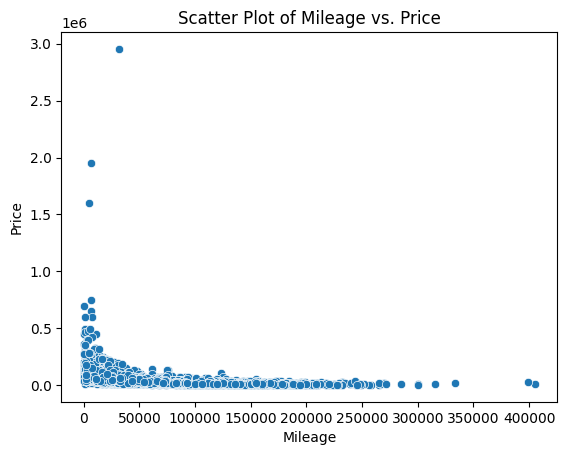

<ipython-input-104-63375cc1b03c>:7: UserWarning: 
The markers list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='milage', y='price', hue='fuel_type' , style='fuel_type', markers=['o', 's', 'D'])


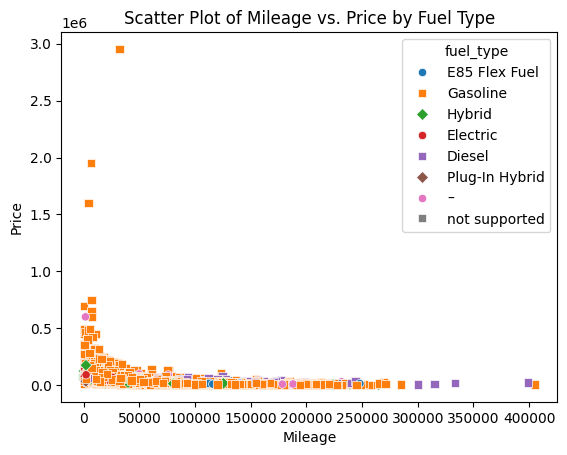

In [ ]:
sns.scatterplot(data=df, x='milage', y='price')
plt.title('Scatter Plot of Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

sns.scatterplot(data=df, x='milage', y='price', hue='fuel_type' , style='fuel_type', markers=['o', 's', 'D'])
plt.title('Scatter Plot of Mileage vs. Price by Fuel Type')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


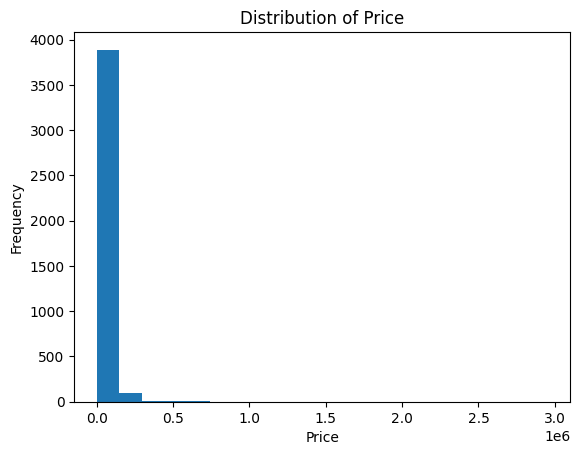

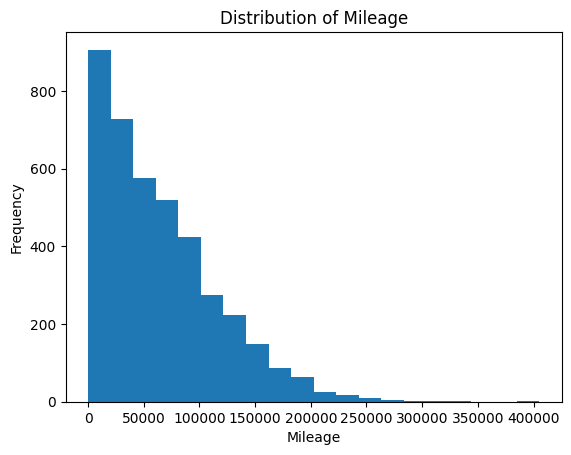

In [ ]:
# Histogram for price
plt.hist(df['price'], bins=20)  # Adjust bins as needed
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for mileage
plt.hist(df['milage'], bins=20)  # Adjust bins as needed
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

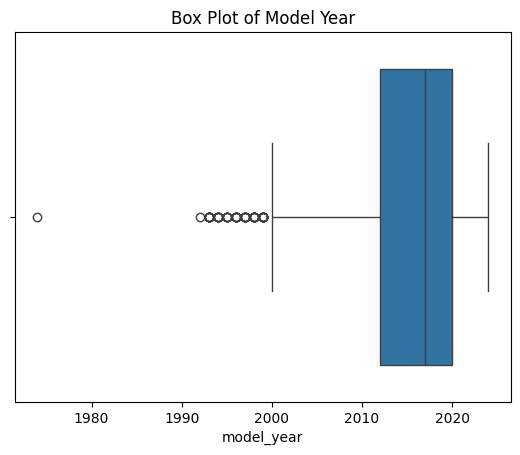

In [ ]:
sns.boxplot(data=df, x="model_year")
plt.title('Box Plot of Model Year')
plt.show()

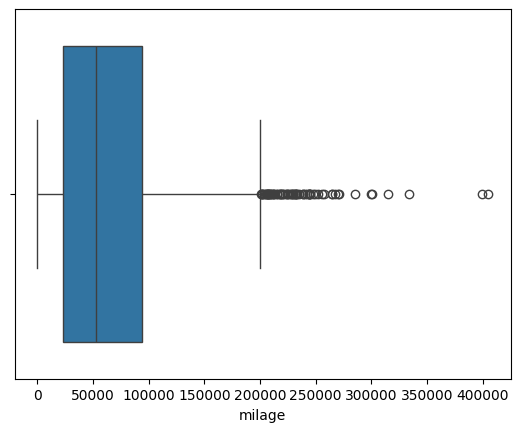

In [ ]:
sns.boxplot(df,x="milage")
plt.show()

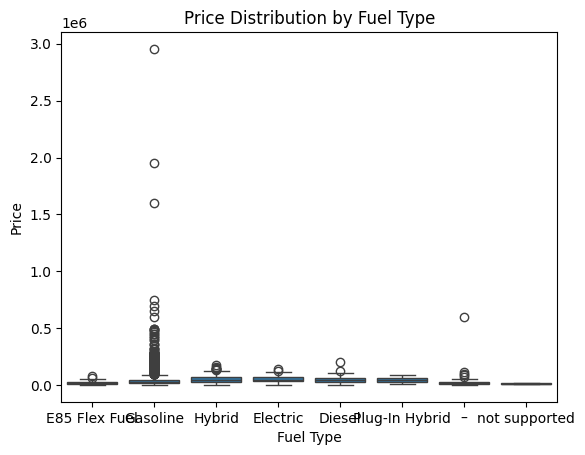

In [ ]:
# Box plot for price by fuel type
sns.boxplot(data=df, x='fuel_type', y='price')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

From above boxplot we can clearly see that gasoline as most of the outliers. lets treat that first

# Treating Outliers

In [ ]:
df_sam=df[df["fuel_type"]=="Gasoline"]
q1=df_sam["price"].quantile(0.25)
q3=df_sam["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)

-29467.5
93912.5


In [ ]:
df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)
df.update(df_sam)

<ipython-input-113-5937ccaead01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)


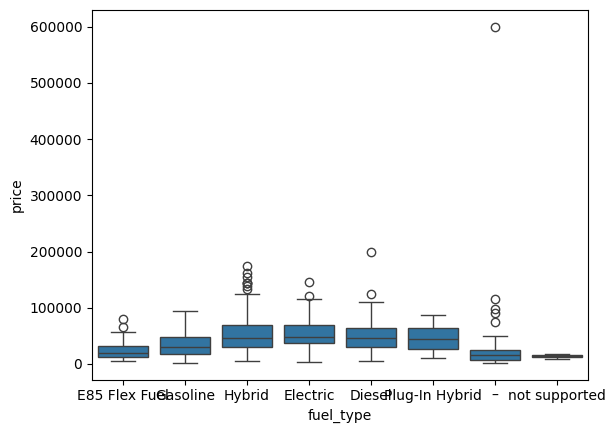

In [ ]:
sns.boxplot(data=df, x='fuel_type', y='price')
plt.show()

In [ ]:
df_sam=df[df["fuel_type"]=="Hybrid"]
q1=df_sam["price"].quantile(0.25)
q3=df_sam["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)
df.update(df_sam)

-29125.0
127475.0


<ipython-input-115-bfdeecac2e27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)


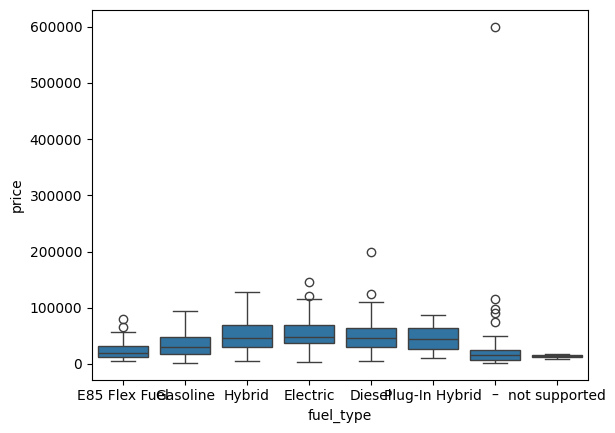

In [ ]:
sns.boxplot(data=df, x='fuel_type', y='price')
plt.show()

-18750.0
51250.0


<ipython-input-117-0503b2f3765e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)


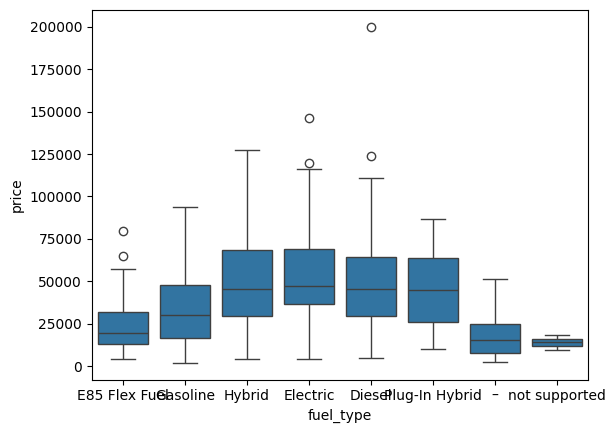

In [ ]:
# df.groupby('fuel_type')['price'].describe()
df_sam=df[df["fuel_type"]=="–"]
q1=df_sam["price"].quantile(0.25)
q3=df_sam["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)
df.update(df_sam)
sns.boxplot(data=df, x='fuel_type', y='price')
plt.show()

-22375.0
116225.0


<ipython-input-118-7c37e61678e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)


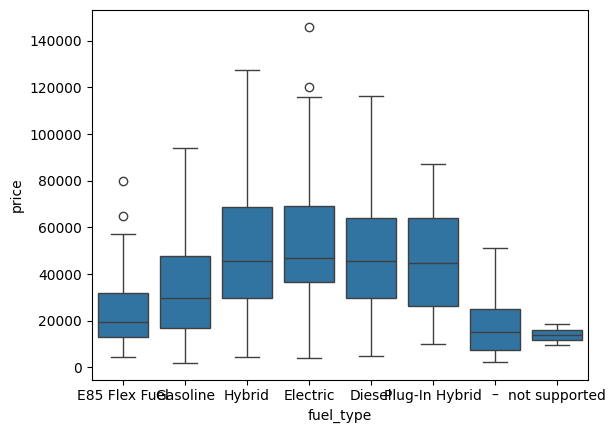

In [ ]:
df_sam=df[df["fuel_type"]=="Diesel"]
q1=df_sam["price"].quantile(0.25)
q3=df_sam["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)
df.update(df_sam)
sns.boxplot(data=df, x='fuel_type', y='price')
plt.show()


-12091.5
117642.5


<ipython-input-119-7aa125c9495a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)


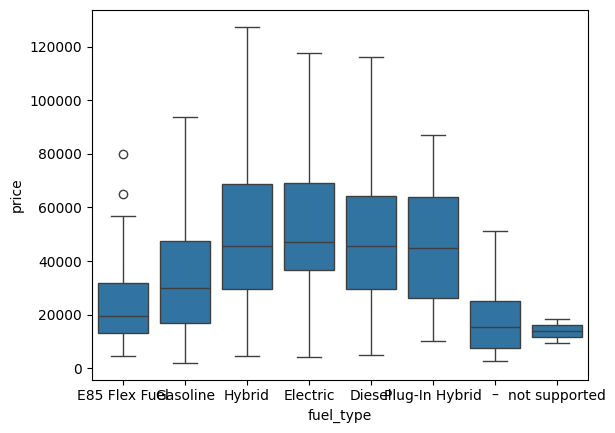

In [ ]:
df_sam=df[df["fuel_type"]=="Electric"]
q1=df_sam["price"].quantile(0.25)
q3=df_sam["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)
df.update(df_sam)
sns.boxplot(data=df, x='fuel_type', y='price')
plt.show()

-15521.0
60395.0


<ipython-input-120-0ce06ee06320>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)


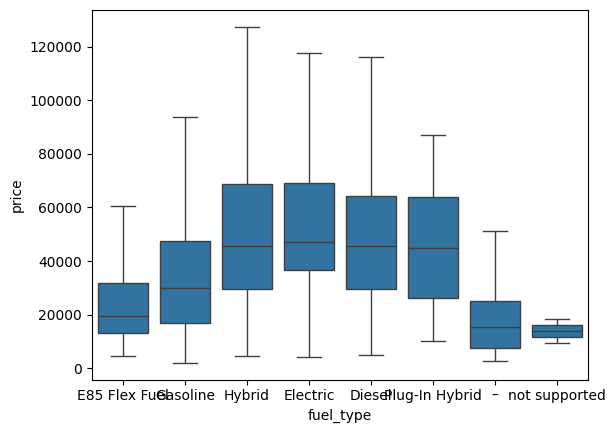

In [ ]:
df_sam=df[df["fuel_type"]=="E85 Flex Fuel"]
q1=df_sam["price"].quantile(0.25)
q3=df_sam["price"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam["price"]=np.clip(df_sam["price"],lower_bound,upper_bound)
df.update(df_sam)
sns.boxplot(data=df, x='fuel_type', y='price')
plt.show()

2000.0
2032.0


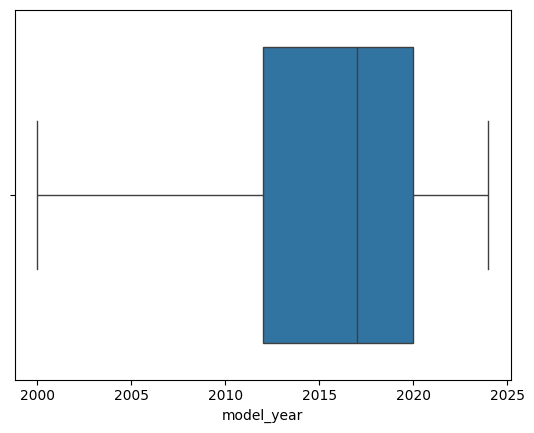

In [ ]:
df_sam=df["model_year"]
q1=df_sam.quantile(0.25)
q3=df_sam.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam=np.clip(df_sam,lower_bound,upper_bound)
df.update(df_sam)
sns.boxplot(data=df, x="model_year")
plt.show()

-83540.0
200684.0


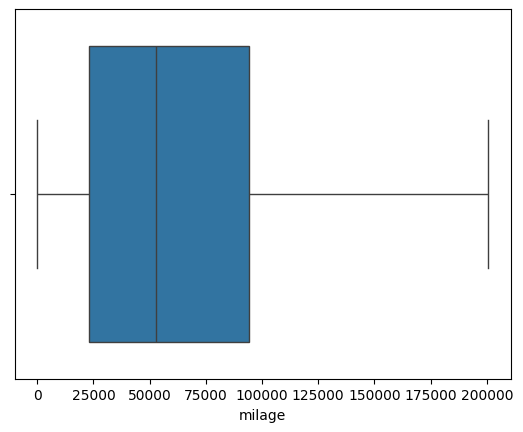

In [ ]:
df_sam=df["milage"]
q1=df_sam.quantile(0.25)
q3=df_sam.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print(lower_bound)
print(upper_bound)
df_sam=np.clip(df_sam,lower_bound,upper_bound)
df.update(df_sam)
sns.boxplot(data=df, x="milage")
plt.show()

Outliers for fueltype and price are treated with upper oulierbound

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) th

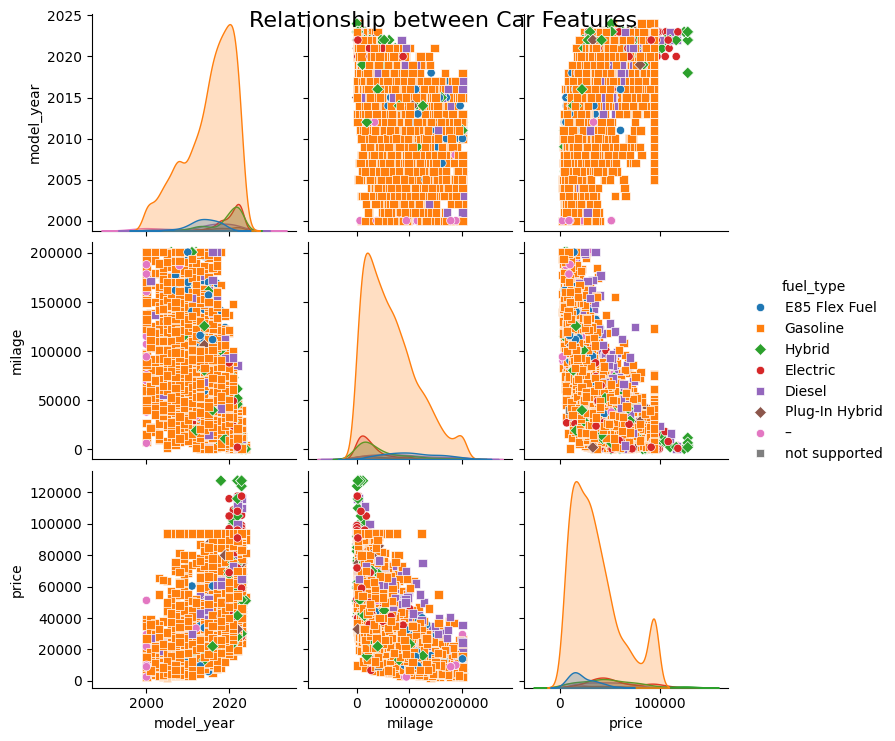

In [ ]:
# Create a pair plot with enhanced features
sns.pairplot(df,
             hue='fuel_type',  # Add color to distinguish fuel types
             markers=['o', 's', 'D'],  # Use different markers for fuel types
             )  # Adjust transparency

plt.suptitle('Relationship between Car Features', fontsize=16)  # Add a main title
plt.show()

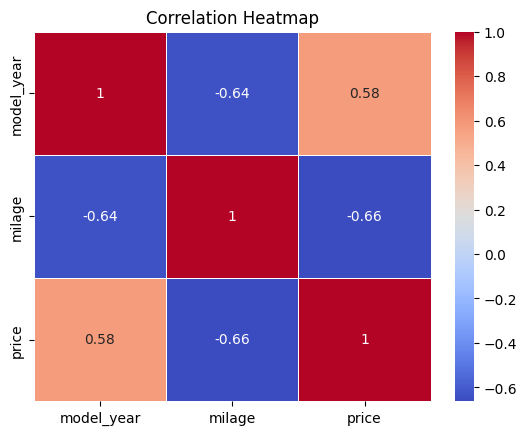

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),annot=True,  cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Linear Regression Implementation – How well you apply regression to extract meaningful insights.

In [ ]:
df.head()

,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.0
3,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# X=df.drop(["price","int_col","ext_col"],axis=1)
X=df.drop("price",axis=1)
y=df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,# specifying the dependent variable
    test_size=0.30,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [ ]:
# creating linear regression training for model_year and milage
var_num=X.select_dtypes(include="number").columns
lin1=LinearRegression()
lin1.fit(X_train[var_num],y_train)
print(len(var_num))

2


In [ ]:
print(
    "Sales =",
    "(", lin1.coef_[0], ")", "*", var_num[0],"+","(", lin1.coef_[1], ")", "*", var_num[1],
    "+", lin1.intercept_,
)

Sales = ( 1184.177702725544 ) * model_year + ( -0.2534727766022694 ) * milage + -2333236.364424115


# One hot encodeing
* here we are performing one hot encodeing for converting categorical data into numerical data.

In [ ]:
X = pd.get_dummies(
    X,    # defining the dataframe from where to fetch the data
    columns=X.select_dtypes(include=["object"]).columns.tolist(),    # defining the type of columns for which dummies will be made
    drop_first=True,    # dropping the first dummy column
)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Columns: 1690 entries, model_year to clean_title_Yes
dtypes: bool(1688), float64(1), int64(1)
memory usage: 6.5 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.30,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [ ]:
var_num=X.columns
lin1=LinearRegression()
lin1.fit(X_train[var_num],y_train)
print(len(var_num))

1690


# Model evaluation

In [ ]:
# function to compute MAPE
def mape_score(targets, predictions):
    # Calculates average % error
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    # Calculate R-square
    r2 = r2_score(targets, predictions)

    '''
    R-square increases or remains the same when a new variable is added,
    however Adjusted R-square penalizes unnecessary variable that do not contribute in predicting Y
    '''

    # n = No of Observations
    n = predictors.shape[0]

    # k = No of Predictors
    k = predictors.shape[1]

    # Calculate & return Adjested R-square
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [ ]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred)  # to compute Adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )

    return df_perf

In [ ]:
model_performance_regression(lin1, X_train, y_train)

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,6013.473697,3531.617408,14.655175,0.945062,0.861792


In [ ]:
# LinearRegression
model_performance_regression(lin1, X_test, y_test)

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,14546.090887,9328.573056,37.425785,0.666755,1.820822
